In [61]:
#Import Libraries
import os
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import randint
import random
from sklearn.ensemble import RandomForestClassifier


In [62]:
#Import Dataset 
DATA_DIR = os.path.join('..','CW','we_data')
data_path = {'train': os.path.join(DATA_DIR, 'train.csv'),
             'validation': os.path.join(DATA_DIR, 'validation.csv'),
            'test': os.path.join(DATA_DIR, 'test.csv'),
            'group_xx': os.path.join(DATA_DIR, 'Group_xx.csv')}
 
train = pd.read_csv(data_path['train'])
validation = pd.read_csv(data_path['validation'])
test = pd.read_csv(data_path['test'])
group_xx = pd.read_csv(data_path['group_xx'])


In [63]:
# Get the first 20 dataset to see the format
train.head(20)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [5]:
def encode_days(df):
    df = pd.concat([df,pd.get_dummies(df.weekday,prefix='day')],axis=1)
    df = df.drop('weekday',axis=1)
    return df
 
def encode_hours(df):
    df = pd.concat([df,pd.get_dummies(df.hour,prefix='hour')],axis=1)
    df = df.drop('hour',axis=1)
    
    return df
 
def encode_region(df):
    df = pd.concat([df,pd.get_dummies(df.region,prefix='region')],axis=1)
    df = df.drop('region',axis=1)
    return df
 
def encode_adexchange(df):
    df = pd.concat([df,pd.get_dummies(df.adexchange,prefix='adexchange')],axis=1)
    df = df.drop('adexchange',axis=1)
    return df
 
def encode_slotwidth(df):
    df = pd.concat([df,pd.get_dummies(df.slotwidth,prefix='slotwidth')],axis=1)
    df = df.drop('slotwidth',axis=1)
    return df
 
def encode_slotheight(df):
    df = pd.concat([df,pd.get_dummies(df.slotheight,prefix='slotheight')],axis=1)
    df = df.drop('slotheight',axis=1)
    return df
 
def encode_advertiser(df):
    df = pd.concat([df,pd.get_dummies(df.advertiser,prefix='advertiser')],axis=1)
    df = df.drop('advertiser',axis=1)
    return df
 
def encode_slotvisibility(df):
    df = pd.concat([df,pd.get_dummies(df.slotvisibility,prefix='slotvisibility')],axis=1)
    df = df.drop('slotvisibility',axis=1)
    return df
 
def encode_slotformat(df):
    df = pd.concat([df,pd.get_dummies(df.slotformat,prefix='slotformat')],axis=1)
    df = df.drop('slotformat',axis=1)
    return df
 
def encode_os_browser(df):
    df_temp = pd.df(df.useragent.str.split('_',1).tolist(), columns = ['OS','browser'])
    df = pd.concat([df,df_temp],axis=1)
    df = df.drop('useragent',axis=1)
    df = pd.concat([df,pd.get_dummies(df.OS,prefix='OS')],axis=1)
    df = df.drop('OS',axis=1)
    df = pd.concat([df,pd.get_dummies(df.browser,prefix='browser')],axis=1)
    df = df.drop('browser',axis=1)
    return df
 
def encode_slotprice(df):
    slotprice_range = pd.df()
    slotprice_range['slotprices'] = pd.cut(df.slotprice.values,5, labels=[1,2,3,4,5])
    df = pd.concat([df,slotprice_range],axis=1)
    df = pd.concat([df,pd.get_dummies(df.slotprices,prefix='slotprice')],axis=1)
    df = df.drop('slotprice',axis=1)
    df = df.drop('slotprices',axis=1)
    return df
 

xtrain = train.drop(['click','bidid','usertag','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
ytrain = train.click

xval = validation.drop(['click','bidid', 'usertag','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
yval = validation.click


xtest = test.drop(['bidid','userid','IP','usertag','city','domain', 'url','urlid','slotid','creative','keypage'], axis=1)
xtrain = encode_adexchange(xtrain)
xtrain = encode_advertiser(xtrain)
xtrain = encode_days(xtrain)
xtrain = encode_hours(xtrain)
xtrain = encode_os_browser(xtrain)
xtrain = encode_region(xtrain)
xtrain = encode_slotformat(xtrain)
xtrain = encode_slotheight(xtrain)
xtrain = encode_slotprice(xtrain)
xtrain = encode_slotvisibility(xtrain)
xtrain = encode_slotwidth(xtrain)

xtrain.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
xval = encode_adexchange(xval)
xval = encode_advertiser(xval)
xval = encode_days(xval)
xval = encode_hours(xval)
xval = encode_os_browser(xval)
xval = encode_region(xval)
xval = encode_slotformat(xval)
xval = encode_slotheight(xval)
xval = encode_slotprice(xval)
xval = encode_slotvisibility(xval)
xval = encode_slotwidth(xval)

xval.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303925 entries, 0 to 303924
Data columns (total 25 columns):
click             303925 non-null int64
weekday           303925 non-null int64
hour              303925 non-null int64
bidid             303925 non-null object
userid            303925 non-null object
useragent         303925 non-null object
IP                303925 non-null object
region            303925 non-null int64
city              303925 non-null int64
adexchange        297749 non-null float64
domain            286993 non-null object
url               293075 non-null object
urlid             0 non-null float64
slotid            303925 non-null object
slotwidth         303925 non-null int64
slotheight        303925 non-null int64
slotvisibility    303925 non-null object
slotformat        303925 non-null object
slotprice         303925 non-null int64
creative          303925 non-null object
bidprice          303925 non-null int64
payprice          303925 non-null int64


In [8]:
xtest = encode_adexchange(xtest)
xtest = encode_advertiser(xtest)
xtest = encode_days(xtest)
xtest = encode_hours(xtest)
xtest = encode_os_browser(xtest)
xtest = encode_region(xtest)
xtest = encode_slotformat(xtest)
xtest = encode_slotheight(xtest)
xtest = encode_slotprice(xtest)
xtest = encode_slotvisibility(xtest)
xtest = encode_slotwidth(xtest)

xtest.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

import xgboost as xgb
#df.sort_index(axis=1, inplace=True)
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier( n_estimators = 300,  max_features = "auto", min_samples_leaf = 50, class_weight = "balanced")
#model = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200)
    
    # train model
    #model.fit(features, labels)
    
    
    #accuracy = model.score(features, labels)


#model = RandomForestClassifier(n_jobs = -1, n_estimators = 300, random_state =100, max_features = "auto", min_samples_leaf = 50, class_weight = "balanced")
 
resultval = model.fit(xtrain, ytrain).predict(xval)


 
#run on test set
#resulttest = model.fit(xtrain, ytrain).predict(xtest)
 


In [10]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Columns: 149 entries, adexchange_1.0 to slotwidth_1000
dtypes: uint8(149)
memory usage: 345.4 MB


In [11]:
predprob = model.predict_proba(xval)

pCTRval = pd.DataFrame(predprob)
pCTRval.head()

,0,1
0,0.845428,0.154572
1,0.873630,0.126370
2,0.905809,0.094191
3,0.873956,0.126044
4,0.969815,0.030185


In [12]:
from sklearn import metrics
fprR, tprR, thresholds = metrics.roc_curve(validation.click, pCTRval[1])
metrics.auc(fprR, tprR)

auc = 'Random Forest Classifier AUC = %.5f' % metrics.auc(fprR, tprR)
mse = 'Random Forest Classifier MSE = %.5f' % metrics.mean_squared_error(fprR, tprR)
(auc, mse)

('Random Forest Classifier AUC = 0.71112',
 'Random Forest Classifier MSE = 0.05238')

In [13]:
import xgboost as xgb
#df.sort_index(axis=1, inplace=True)
#from sklearn.ensemble import RandomForestClassifier
 
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
C=1.0,fit_intercept=True,intercept_scaling=1,class_weight='balanced',random_state=None,solver='liblinear', 
                          max_iter=100,multi_class='ovr', 
                          verbose=0, 
                          warm_start=False, 
                          n_jobs=1)

resultval = model2.fit(xtrain, ytrain).predict(xval)

In [14]:
# from sklearn.ensemble import GradientBoostingClassifier

# model3 = GradientBoostingClassifier()
# #model3 = LogisticRegression(penalty='l2')

# resultval3 = model3.fit(xtrain, ytrain).predict(xval)

In [15]:
# predprob3 = model3.predict_proba(xval)
# pCTRval3 = pd.DataFrame(predprob3)
# fprG, tprG, thresholds = metrics.roc_curve(validation.click, pCTRval3[1])
# metrics.auc(fprG, tprG)

In [17]:
predprob2 = model2.predict_proba(xval)
pCTRval2 = pd.DataFrame(predprob2)
fprL, tprL, thresholds = metrics.roc_curve(validation.click, pCTRval2[1])
#metrics.auc(fpr, tpr)
aucR = 'Random Forest Classifier AUC = %.5f' % metrics.auc(fprR, tprR)
mseR = 'Random Forest Classifier MSE = %.5f' % metrics.mean_squared_error(fprR, tprR)
aucL = 'Logistic Regression AUC = %.5f' % metrics.auc(fprL, tprL)
mseL = 'Logistic Regression MSE = %.5f' % metrics.mean_squared_error(fprL, tprL)


(aucL, aucR,  mseL, mseR )

('Logistic Regression AUC = 0.72588',
 'Random Forest Classifier AUC = 0.71112',
 'Logistic Regression MSE = 0.06172',
 'Random Forest Classifier MSE = 0.05238')

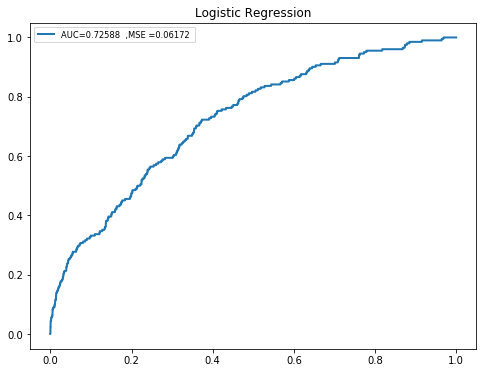

In [20]:
f, axes = plt.subplots(1, figsize=(8, 6))
lab = 'AUC=%.5f  ,MSE =%.5f ' % (metrics.auc(fprL, tprL), metrics.mean_squared_error(fprL, tprL))
axes.step(fprL, tprL, lw=2,label=lab)

axes.legend(loc='upper left', fontsize='small')
plt.title("Logistic Regression")
plt.show()

In [54]:
pctrval = pd.read_csv('pCTRval.csv')
average_ctr = validation.click.sum() / validation.bidid.count()
pctrval_list = list(pctrval['0'])

In [55]:
def linear_bidding(pctrval_list):
    bids = []
    max_bid = 300
    for bid in range(10, max_bid+10, 10):
        for pctr in pctrval_list:
            bids.append(bid * pctr / average_ctr)

    bid_groups = [bids[x:x+len(pctrval)] for x in range(0, len(bids), len(pctrval))]
    return bid_groups

In [56]:
def data(df, pctrVal):
    df_data = pd.DataFrame(columns=['bid', 'imps','clicks','spent','CTR','CPC','CPM'])
    lists = {'bid':[],  'imps':[], 'spent':[], 'clicks':[],'ctr':[], 'cpc':[], 'cpm':[]}
    pctrval_list = pctrVal
    bid_groups = linear_bidding1(pctrval_list)

    maxi = 0
    maxv = -1
    for group in range(0,len(bid_groups)):
        budget = 6250.0
        spent = 0
        clicks = 0
        imps = 0
        bid = bid_groups[group]
        check = bid >= validation.payprice
        for i in range(0,len(check)):
            payprice = validation.payprice[i]
            if budget < payprice:
                break
            if check[i]:
                imps = imps + 1
                clicks = clicks + validation.click[i]
                budget = budget - payprice
                spent = spent + payprice
        spent = spent / 1000
        ctr = ((clicks / imps) * 100)
        cpm = ((spent / imps) * 1000)
        cpc = (spent / clicks)
        if ctr * clicks > maxv:
            maxv = ctr * clicks
            maxi = group
        lists['bid'] = range(10, 310, 10)
        lists['clicks'].append(clicks)
        lists['imps'].append(imps)
        lists['spent'].append(spent)
        lists['ctr'].append(ctr)
        lists['cpc'].append(cpc)
        lists['cpm'].append(cpm)
    return df_data

In [53]:
#data(df_data).bid = lists['bid']

In [60]:
def data_result():
    data(df_data, pctrval_list).bid = lists['bid']
    data(df_data, pctrval_list).clicks = lists['clicks']
    data(df_data, pctrval_list).imps = lists['imps']
    data(df_data, pctrval_list).spent = lists['spent']
    data(df_data, pctrval_list).CTR = lists['ctr']
    data(df_data, pctrval_list).CPC = lists['cpc']
    data(df_data, pctrval_list).CPM = lists['cpm']
    return data(df_data, pctrval_list)
    data(df_data, pctrval_list)

,bid,imps,clicks,spent,CTR,CPC,CPM
0,10,6331,4,32.365,0.063181,8.091250,5.112147
1,20,17855,5,146.134,0.028003,29.226800,8.184486
2,30,31060,12,373.260,0.038635,31.105000,12.017386
3,40,45587,22,693.253,0.048259,31.511500,15.207252
4,50,60474,30,1105.595,0.049608,36.853167,18.282154
5,60,73951,37,1570.113,0.050033,42.435486,21.231802
6,70,88971,49,2260.923,0.055074,46.141286,25.411909
7,80,108137,64,3340.583,0.059184,52.196609,30.892137
8,90,130238,85,4725.727,0.065265,55.596788,36.285316
9,100,151709,107,6148.348,0.070530,57.461196,40.527246


In [35]:
data_resul(df_data).iloc[np.where(data_resul(df_data).clicks == data_resul(df_data).clicks.max())[0]]

,bid,imps,clicks,spent,CTR,CPC,CPM
29,300,125663,113,6076.957,0.089923,53.778381,48.359159


# Using Random Forest classification - RandomForestClassifier

In [45]:
pctrval_Ran = pd.read_csv('pCTRval1.csv')
average_ctr = validation.click.sum() / validation.bidid.count()
pctrval_listRan = list(pctrval_Ran['0'])

In [46]:
linear_bidding1(pctrval_listRan)

In [48]:
def data_result():
    data(df_data, pctrval_listRan).bid = lists['bid']
    data(df_data, pctrval_listRan).clicks = lists['clicks']
    data(df_data, pctrval_listRan).imps = lists['imps']
    data(df_data, pctrval_listRan).spent = lists['spent']
    data(df_data, pctrval_listRan).CTR = lists['ctr']
    data(df_data, pctrval_listRan).CPC = lists['cpc']
    data(df_data, pctrval_listRan).CPM = lists['cpm']
    return data(df_data, pctrval_listRan)
    data(df_data, pctrval_listRan)

,bid,imps,clicks,spent,CTR,CPC,CPM
0,10,6331,4,32.365,0.063181,8.091250,5.112147
1,20,17855,5,146.134,0.028003,29.226800,8.184486
2,30,31060,12,373.260,0.038635,31.105000,12.017386
3,40,45587,22,693.253,0.048259,31.511500,15.207252
4,50,60474,30,1105.595,0.049608,36.853167,18.282154
5,60,73951,37,1570.113,0.050033,42.435486,21.231802
6,70,88971,49,2260.923,0.055074,46.141286,25.411909
7,80,108137,64,3340.583,0.059184,52.196609,30.892137
8,90,130238,85,4725.727,0.065265,55.596788,36.285316
9,100,151709,107,6148.348,0.070530,57.461196,40.527246


In [49]:
df_data.iloc[np.where(df_data.clicks == df_data.clicks.max())[0]]

,bid,imps,clicks,spent,CTR,CPC,CPM
9,100,151709,107,6148.348,0.07053,57.461196,40.527246
